In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="Dark2")

In [3]:
df = pd.read_csv('../../Data/Processed/Occupancy_processed.csv', parse_dates=['date'])

## Resumo dos dados

In [4]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228
std,1.055315,4.982154,210.430875,311.201281,0.000768
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,20.200000,24.500000,0.000000,460.000000,0.003719
50%,20.700000,27.290000,0.000000,565.416667,0.004292
75%,21.525000,31.290000,301.000000,804.666667,0.004832
max,24.408333,39.500000,1697.250000,2076.500000,0.006476


## Distribuição das categorias

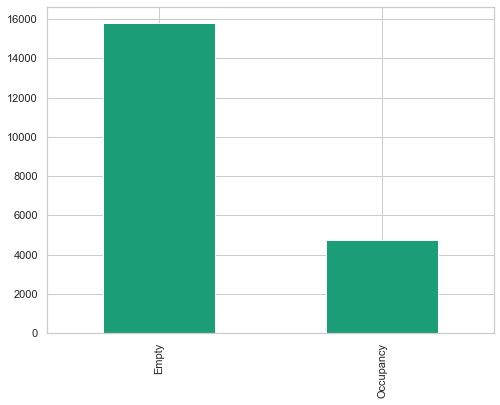

In [5]:
df["Occupancy"].value_counts().plot(kind='bar',figsize=(8,6));

## Histogramas

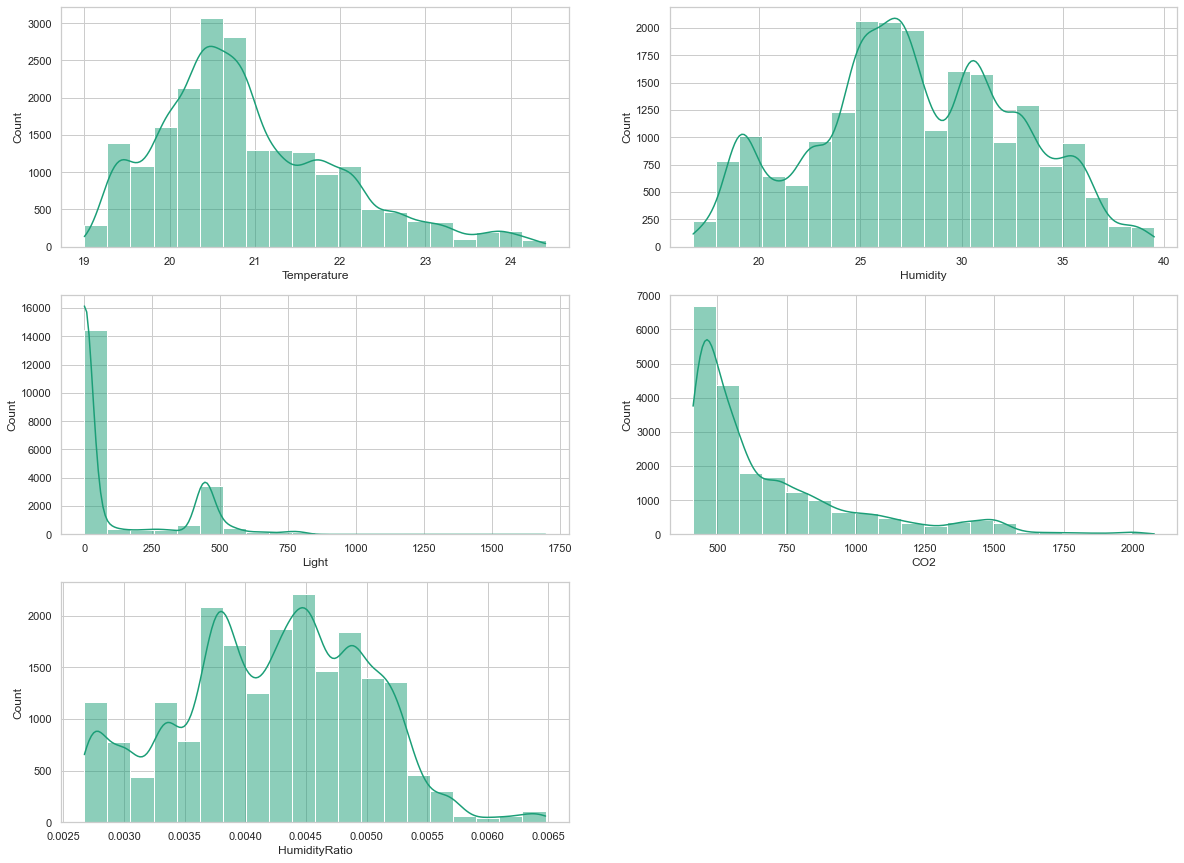

In [6]:
numerical_features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
fig, axes = plt.subplots(3, 2, figsize=[20, 15])
lin,col=0,0

for feature in numerical_features:
    if col == 2:
        col=0
        lin+=1

    sns.histplot(x=df[feature],
                 bins=20,
                 kde=True,
                 ax=axes[lin,col])
    col+=1

fig.delaxes(axes[2,1])
plt.show()

## Histogramas com agrupamento por classe

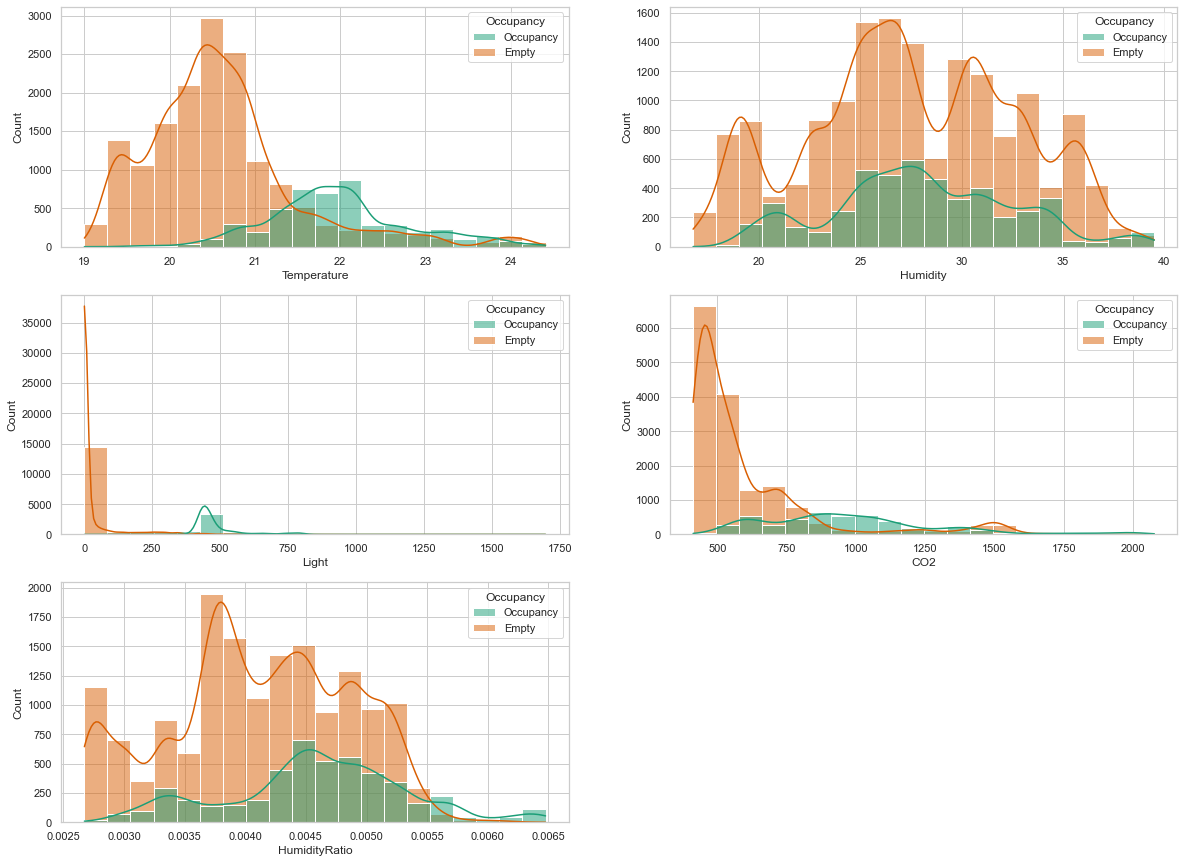

In [7]:
fig, axes = plt.subplots(3, 2, figsize=[20, 15])

lin,col=0,0

for feature in numerical_features:
    if col == 2:
        col=0
        lin+=1

    sns.histplot(x=df[feature],
                 hue=df['Occupancy'],
                 bins=20,
                 kde=True,
                 ax=axes[lin,col])
    col+=1

fig.delaxes(axes[2,1])
plt.show()

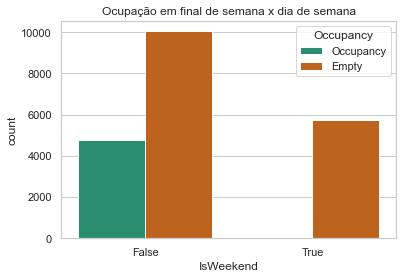

In [14]:
sns.countplot(x='IsWeekend', hue='Occupancy', data=df).set_title("Ocupação em final de semana x dia de semana");

## Correlações

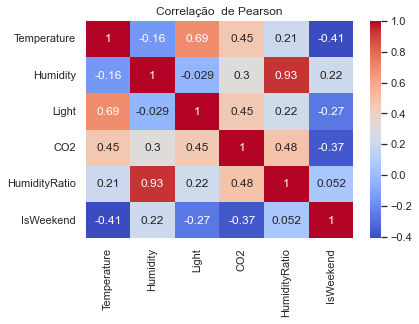

In [9]:
pearson = df.corr(method="pearson")
dataplot = sns.heatmap(pearson, cmap="coolwarm", annot=True).set_title("Correlação  de Pearson")

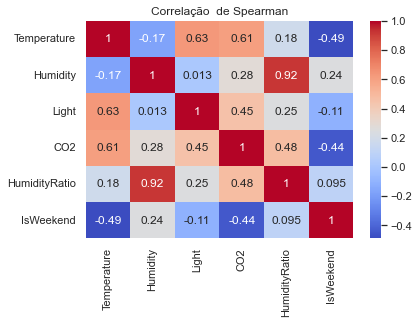

In [10]:
spearman = df.corr(method="spearman")
dataplot = sns.heatmap(spearman, cmap="coolwarm", annot=True).set_title("Correlação  de Spearman")

## Gráfico de dispersão

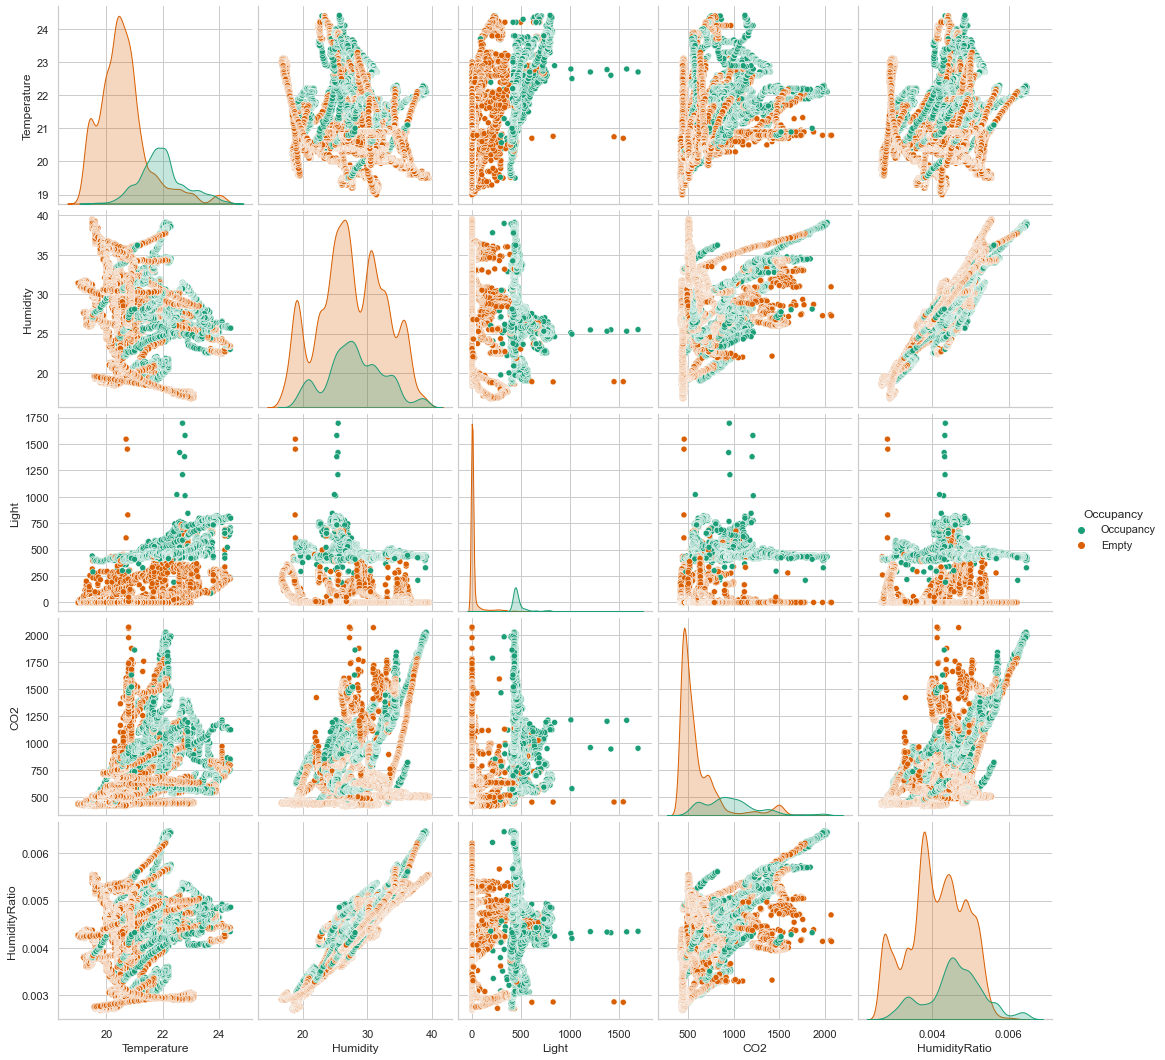

In [16]:
sns.pairplot(df.drop('IsWeekend', axis=1), hue="Occupancy", size=3);

## Análise de Outliers

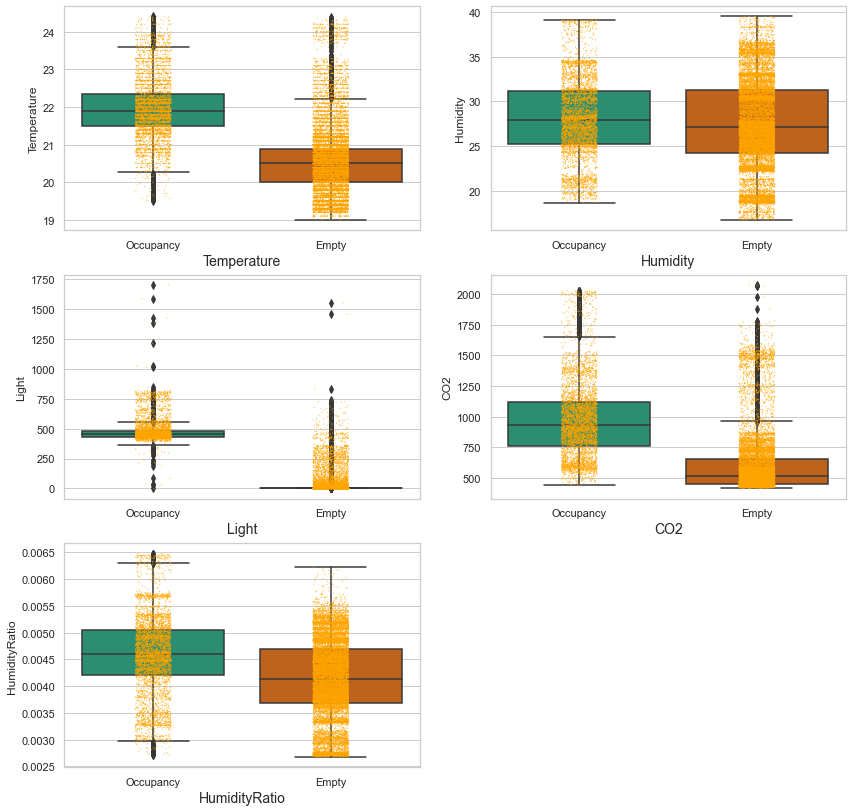

In [17]:
fig = plt.figure(figsize=(14,14))

for i, numerical_feature in enumerate(df[numerical_features]):
    ax = fig.add_subplot(3,2,i+1)
    i += 1
    ax = sns.boxplot(x = 'Occupancy', y = numerical_feature, data = df)
    ax = sns.stripplot(x = 'Occupancy', y = numerical_feature, data = df, color = 'orange', jitter = 1, size = 1.2, alpha=0.7)
    ax.set_xlabel(numerical_feature, size = 14)

plt.show()